task 1

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Step 1: Load and preprocess the dataset
file_path = 'electricity19.csv'
data = pd.read_csv(file_path)

# Step 2: Remove non-numeric columns ("stabf")
numeric_data = data.select_dtypes(include=['number'])
target_variable = data['stabf']  # Separate the target variable

# Step 3: Fill missing values with the mean of each column
numeric_data.fillna(numeric_data.mean(), inplace=True)

# Step 4: Scale the data using StandardScaler
scaler = StandardScaler()
scaled_features = scaler.fit_transform(numeric_data)

# Convert the scaled data back to a DataFrame
scaled_data = pd.DataFrame(scaled_features, columns=numeric_data.columns)

# Display the first few rows of the scaled dataset
print(scaled_data.head())


       tau1      tau2      tau3      tau4        p1        p2        p3  \
0 -0.835374 -0.791317  1.141704  1.652103  0.017397  1.079405 -0.017078   
1  1.478297 -0.126705 -0.803111 -1.415043  1.752124 -1.593619 -1.438158   
2  1.357093  1.312140 -0.803499 -1.471504 -0.458492  0.098253 -0.062840   
3 -1.653138  0.882289 -0.278354 -1.060901  0.284250  0.513904 -1.591046   
4 -0.771543  0.860108 -0.111670  1.680114 -0.298075  0.287450 -1.376343   

         p4        g1        g2        g3        g4      stab  
0 -1.092545  0.457467  1.220013  1.321628  1.579026  1.073120  
1 -0.011575 -0.406791  1.230354  0.135424  0.936256 -0.587487  
2  0.760963 -1.319852  0.881299  1.146596 -1.513802 -0.332095  
3  0.583414 -0.287304  1.647250  1.474543 -0.591750  0.355922  
4  1.606636  0.992226 -0.253610  0.481133  1.079063  0.924487  


task 2

In [ ]:
from sklearn.decomposition import PCA
import plotly.express as px
# Step 5: Perform PCA with 2 components
pca_2 = PCA(n_components=2)
principal_components_2 = pca_2.fit_transform(scaled_features)
explained_variance_2 = pca_2.explained_variance_ratio_
pca_2_df = pd.DataFrame(data=principal_components_2, columns=['PC1', 'PC2'])
pca_2_df['target'] = target_variable

# Step 6: Perform PCA with 3 components
pca_3 = PCA(n_components=3)
principal_components_3 = pca_3.fit_transform(scaled_features)
explained_variance_3 = pca_3.explained_variance_ratio_
pca_3_df = pd.DataFrame(data=principal_components_3, columns=['PC1', 'PC2', 'PC3'])
pca_3_df['target'] = target_variable

# Step 7: Plot PCA with 2 components
fig_2d = px.scatter(
    pca_2_df, x='PC1', y='PC2', color='target',
    title=f'PCA with 2 Components (Variance Explained: {sum(explained_variance_2):.2f})',
    labels={'color': 'Target'}
)
fig_2d.show()

# Step 8: Plot PCA with 3 components
fig_3d = px.scatter_3d(
    pca_3_df, x='PC1', y='PC2', z='PC3', color='target',
    title=f'PCA with 3 Components (Variance Explained: {sum(explained_variance_3):.2f})',
    labels={'color': 'Target'}
)
fig_3d.show()

# Step 9: Plot variance explained by number of components
pca_full = PCA()
pca_full.fit(scaled_features)
explained_variance_ratio = pca_full.explained_variance_ratio_
fig_variance = px.line(
    x=range(1, len(explained_variance_ratio) + 1), y=explained_variance_ratio.cumsum(),
    title='Cumulative Variance Explained by Number of Components',
    labels={'x': 'Number of Components', 'y': 'Cumulative Variance Explained'}
)
fig_variance.show()


TASK 3

In [ ]:
from sklearn.manifold import TSNE
# Step 10: Perform t-SNE with 2 components
tsne_2 = TSNE(n_components=2, perplexity=30, learning_rate=200, max_iter=1000, random_state=42)
tsne_2_results = tsne_2.fit_transform(scaled_features[:1000])  # Use a subset of data for speed
tsne_2_df = pd.DataFrame(data=tsne_2_results, columns=['Dim1', 'Dim2'])
tsne_2_df['target'] = target_variable[:1000]

# Plot t-SNE with 2 components
fig_tsne_2d = px.scatter(
    tsne_2_df, x='Dim1', y='Dim2', color='target',
    title='t-SNE with 2 Components',
    labels={'color': 'Target'}
)
fig_tsne_2d.show()

# Step 11: Perform t-SNE with 3 components
tsne_3 = TSNE(n_components=3, perplexity=15, max_iter=500, random_state=42)
tsne_3_results = tsne_3.fit_transform(scaled_features[:1000])  # Use a subset of data for speed
tsne_3_df = pd.DataFrame(data=tsne_3_results, columns=['Dim1', 'Dim2', 'Dim3'])
tsne_3_df['target'] = target_variable[:1000]

# Plot t-SNE with 3 components
fig_tsne_3d = px.scatter_3d(
    tsne_3_df, x='Dim1', y='Dim2', z='Dim3', color='target',
    title='t-SNE with 3 Components',
    labels={'color': 'Target'}
)
fig_tsne_3d.show()


PROBLEM 2
TASK 1

In [ ]:
from sklearn.cluster import KMeans
# Step 1: Perform k-means clustering and elbow method
inertia = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

# Plot the elbow method
fig_elbow = px.line(
    x=list(K), y=inertia,
    title='Elbow Method for Optimal k',
    labels={'x': 'Number of Clusters', 'y': 'Inertia'}
)
fig_elbow.show()

# Perform k-means with optimal k (e.g., k=3 based on elbow plot)
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(scaled_features)

# Add cluster labels to PCA and t-SNE DataFrames
pca_2_df['cluster'] = clusters
pca_3_df['cluster'] = clusters
tsne_2_df['cluster'] = clusters[:1000]
tsne_3_df['cluster'] = clusters[:1000]

# Visualise k-means clusters on PCA plots
fig_pca_2d_clusters = px.scatter(
    pca_2_df, x='PC1', y='PC2', color='cluster',
    title='k-Means Clusters on PCA (2 Components)',
    labels={'color': 'Cluster'}
)
fig_pca_2d_clusters.show()

fig_pca_3d_clusters = px.scatter_3d(
    pca_3_df, x='PC1', y='PC2', z='PC3', color='cluster',
    title='k-Means Clusters on PCA (3 Components)',
    labels={'color': 'Cluster'}
)
fig_pca_3d_clusters.show()

# Visualise k-means clusters on t-SNE plots
fig_tsne_2d_clusters = px.scatter(
    tsne_2_df, x='Dim1', y='Dim2', color='cluster',
    title='k-Means Clusters on t-SNE (2 Components)',
    labels={'color': 'Cluster'}
)
fig_tsne_2d_clusters.show()

fig_tsne_3d_clusters = px.scatter_3d(
    tsne_3_df, x='Dim1', y='Dim2', z='Dim3', color='cluster',
    title='k-Means Clusters on t-SNE (3 Components)',
    labels={'color': 'Cluster'}
)
fig_tsne_3d_clusters.show()

# Combine cluster labels and target variable into a single DataFrame
comparison_df = pd.DataFrame({
    'cluster': pca_2_df['cluster'],  # Cluster labels (k-means results)
    'target': target_variable  # Target variable (stable/unstable)
})

# Create a crosstab to analyze the relationship between clusters and target variable
cross_tab = pd.crosstab(comparison_df['cluster'], comparison_df['target'])
print("Crosstab of Clusters and Target Variable:")
print(cross_tab)

# Calculate percentage distribution for each cluster
percentages = cross_tab.div(cross_tab.sum(axis=1), axis=0) * 100
print("\nPercentage Distribution of Clusters and Target Variable:")
print(percentages)




Crosstab of Clusters and Target Variable:
target   stable  unstable
cluster                  
0            92      3223
1           788      2604
2          2740       553

Percentage Distribution of Clusters and Target Variable:
target      stable   unstable
cluster                      
0         2.775264  97.224736
1        23.231132  76.768868
2        83.206802  16.793198


TASK 2

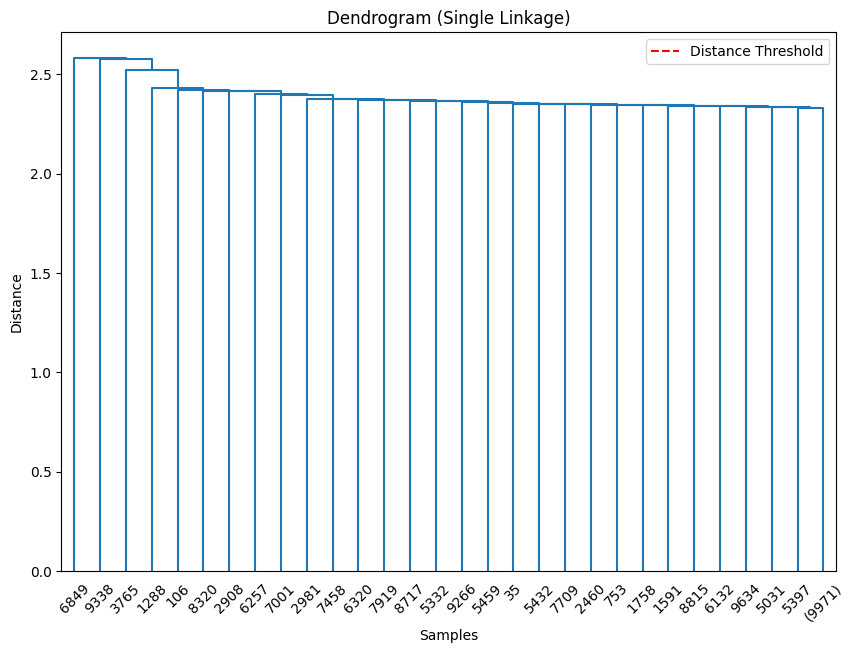

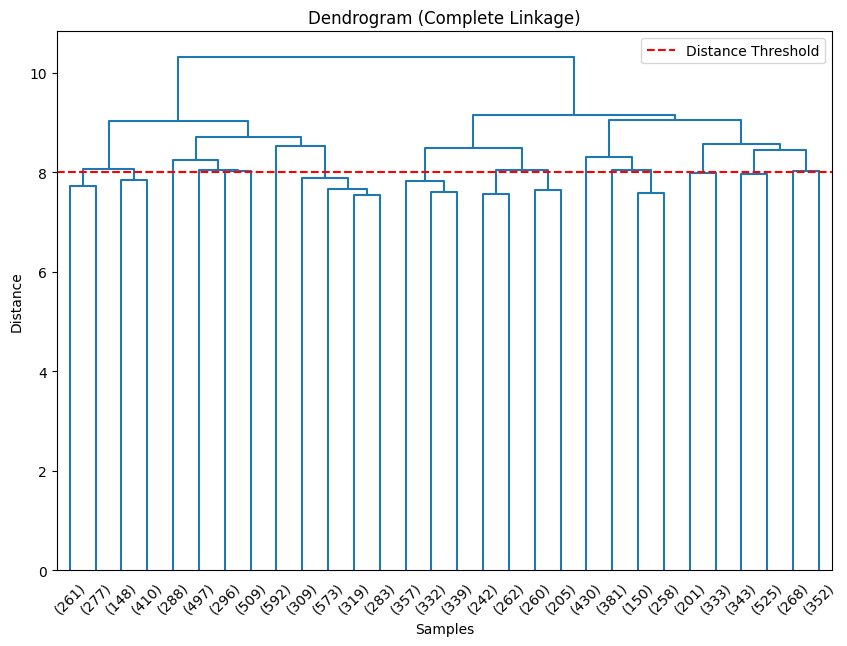

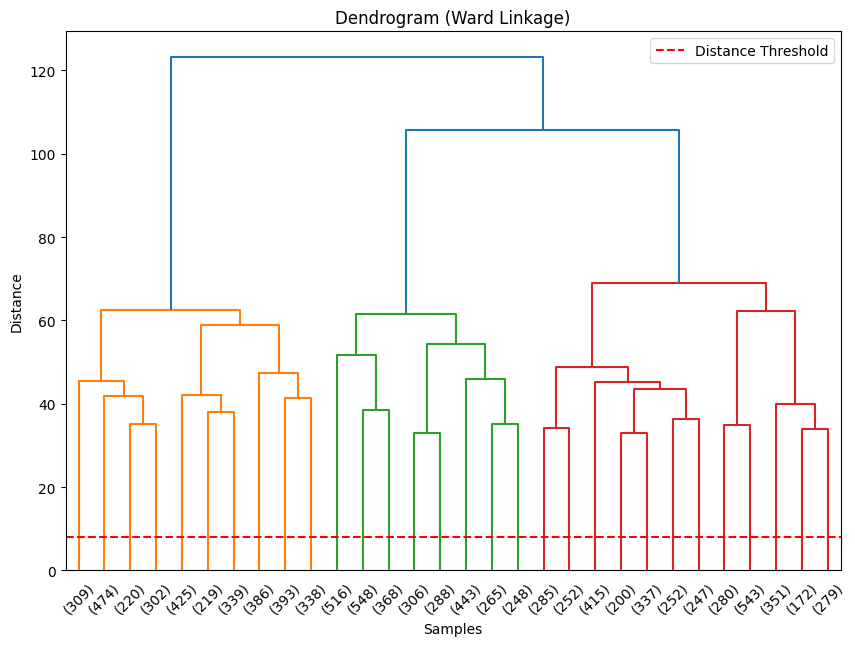


Optimal number of clusters based on threshold:
Single linkage: Optimal number of clusters = 1
Complete linkage: Optimal number of clusters = 18
Ward linkage: Optimal number of clusters = 506



Silhouette Scores:
Kmeans Method: 0.085
Single Method: Not applicable (only one cluster)
Complete Method: -0.014
Ward Method: 0.049

Comparison DataFrame with Silhouette Scores:
        PC1       PC2       PC3       Dim1       Dim2    Dim1_3D    Dim2_3D  \
0  0.256618  2.210613  0.738640 -22.820868   6.667387  18.330973   3.466917   
1  2.481261 -0.488101  0.580624 -30.590475  12.573538   2.579506  22.063019   
2 -0.589188 -0.186492 -1.577228  15.940532  10.282806  -4.966906  -3.548898   
3  0.439729  0.332784 -0.611991  -5.397495  12.287031   5.495972  -3.688720   
4 -0.305013  1.656870  1.089688  -7.769946  24.493486  14.407598   2.382481   

     Dim3_3D  kmeans_cluster  cluster_single single_silhouette  \
0  10.948252               0               1              None   
1   5.345679               0               1              None   
2 -15.882733               1               1              None   
3   7.693673               0               1              None   
4   0.473521    

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import pandas as pd

# Step 1: Hierarchical clustering (single, complete, ward)
methods = ['single', 'complete', 'ward']
linkage_matrices = {}
for method in methods:
    linkage_matrices[method] = linkage(scaled_features, method=method)

# Step 2: Visualise dendrograms with truncation and add threshold line
for method, linkage_matrix in linkage_matrices.items():
    plt.figure(figsize=(10, 7))
    dendrogram(linkage_matrix, truncate_mode='lastp', p=30)
    plt.axhline(y=8, color='r', linestyle='--', label='Distance Threshold')  # Adjust threshold
    plt.title(f'Dendrogram ({method.capitalize()} Linkage)')
    plt.xlabel('Samples')
    plt.ylabel('Distance')
    plt.legend()
    plt.show()

# Step 3: Automatically determine the optimal number of clusters based on the threshold
threshold = 8  # Recommended threshold level
clusters_hierarchical = {}
print("\nOptimal number of clusters based on threshold:")
for method, linkage_matrix in linkage_matrices.items():
    # Extract cluster labels based on threshold
    cluster_labels = fcluster(linkage_matrix, threshold, criterion='distance')
    n_clusters = len(set(cluster_labels))  # Count unique clusters
    clusters_hierarchical[method] = cluster_labels
    print(f"{method.capitalize()} linkage: Optimal number of clusters = {n_clusters}")

# Step 4: Add hierarchical clustering results to PCA DataFrames
for method, cluster_labels in clusters_hierarchical.items():
    pca_2_df[f'cluster_{method}'] = cluster_labels
    pca_3_df[f'cluster_{method}'] = cluster_labels

# Visualise clustering results on PCA plots (2D)
for method in methods:
    fig_pca_2d = px.scatter(
        pca_2_df, x='PC1', y='PC2', color=f'cluster_{method}',
        title=f'Hierarchical Clustering ({method.capitalize()}) on PCA (2 Components)',
        labels={'color': 'Cluster'}
    )
    fig_pca_2d.show()

# Visualise clustering results on PCA plots (3D)
for method in methods:
    fig_pca_3d = px.scatter_3d(
        pca_3_df, x='PC1', y='PC2', z='PC3', color=f'cluster_{method}',
        title=f'Hierarchical Clustering ({method.capitalize()}) on PCA (3 Components)',
        labels={'color': 'Cluster'}
    )
    fig_pca_3d.show()

# Step 5: Add hierarchical clustering results to t-SNE DataFrames
for method, cluster_labels in clusters_hierarchical.items():
    tsne_2_df[f'cluster_{method}'] = cluster_labels[:1000]

# Visualise clustering results on t-SNE plots (2D)
for method in methods:
    fig_tsne_2d = px.scatter(
        tsne_2_df, x='Dim1', y='Dim2', color=f'cluster_{method}',
        title=f'Hierarchical Clustering ({method.capitalize()}) on t-SNE (2 Components)',
        labels={'color': 'Cluster'}
    )
    fig_tsne_2d.show()

# Add hierarchical clustering results to t-SNE 3D DataFrame
for method, cluster_labels in clusters_hierarchical.items():
    tsne_3_df[f'cluster_{method}'] = cluster_labels[:1000]

# Visualise clustering results on t-SNE plots (3D)
for method in methods:
    fig_tsne_3d = px.scatter_3d(
        tsne_3_df, x='Dim1', y='Dim2', z='Dim3', color=f'cluster_{method}',
        title=f'Hierarchical Clustering ({method.capitalize()}) on t-SNE (3 Components)',
        labels={'color': 'Cluster'}
    )
    fig_tsne_3d.show()

# Step 6: Calculate silhouette scores for hierarchical and k-means clustering
silhouette_scores = {}

# Silhouette score for k-means
silhouette_scores['kmeans'] = silhouette_score(scaled_features, clusters)

# Silhouette scores for hierarchical methods
for method, cluster_labels in clusters_hierarchical.items():
    if len(set(cluster_labels)) > 1:  # Ensure there is more than one cluster
        silhouette_scores[method] = silhouette_score(scaled_features, cluster_labels)
    else:
        silhouette_scores[method] = None  # Not applicable if only one cluster

# Print silhouette scores
print("\nSilhouette Scores:")
for method, score in silhouette_scores.items():
    if score is not None:
        print(f"{method.capitalize()} Method: {score:.3f}")
    else:
        print(f"{method.capitalize()} Method: Not applicable (only one cluster)")

# Step 7: Combine all results into a comparison DataFrame
comparison_df = pd.DataFrame()
comparison_df['PC1'] = pca_2_df['PC1']
comparison_df['PC2'] = pca_2_df['PC2']
comparison_df['PC3'] = pca_3_df['PC3']
comparison_df['Dim1'] = tsne_2_df['Dim1']
comparison_df['Dim2'] = tsne_2_df['Dim2']
comparison_df['Dim1_3D'] = tsne_3_df['Dim1']
comparison_df['Dim2_3D'] = tsne_3_df['Dim2']
comparison_df['Dim3_3D'] = tsne_3_df['Dim3']
comparison_df['kmeans_cluster'] = clusters

for method, cluster_labels in clusters_hierarchical.items():
    comparison_df[f'cluster_{method}'] = cluster_labels
    comparison_df[f'{method}_silhouette'] = silhouette_scores.get(method)

comparison_df['kmeans_silhouette'] = silhouette_scores['kmeans']

# Display the updated comparison DataFrame
print("\nComparison DataFrame with Silhouette Scores:")
print(comparison_df.head())


TASK 3

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import adjusted_rand_score
from sklearn.model_selection import ParameterGrid
import pandas as pd
import plotly.express as px

# Step 1: Perform DBScan clustering with parameter optimization
dbscan_params = {'eps': [0.3, 0.5, 0.7], 'min_samples': [3, 5, 10]}
best_dbscan_score = -1
best_dbscan_labels = None

for params in ParameterGrid(dbscan_params):
    dbscan = DBSCAN(eps=params['eps'], min_samples=params['min_samples'])
    dbscan_labels = dbscan.fit_predict(scaled_features)
    if len(set(dbscan_labels)) > 1:  # Ensure there are at least two clusters
        score = adjusted_rand_score(clusters, dbscan_labels)
        if score > best_dbscan_score:
            best_dbscan_score = score
            best_dbscan_labels = dbscan_labels

# Use the best DBSCAN labels or fallback to default parameters
if best_dbscan_labels is None:
    print("No suitable DBSCAN parameters found. Using default parameters.")
    dbscan = DBSCAN(eps=0.5, min_samples=5)
    dbscan_labels = dbscan.fit_predict(scaled_features)
else:
    dbscan_labels = best_dbscan_labels

# Add DBSCAN results to DataFrames
tsne_2_df['dbscan_cluster'] = dbscan_labels[:1000]  # Adjust to t-SNE subset size
tsne_3_df['dbscan_cluster'] = dbscan_labels[:1000]  # Adjust to t-SNE subset size
pca_2_df['dbscan_cluster'] = dbscan_labels
pca_3_df['dbscan_cluster'] = dbscan_labels

# Step 2: Visualise DBScan results on PCA and t-SNE plots
fig_pca_2d_dbscan = px.scatter(
    pca_2_df, x='PC1', y='PC2', color='dbscan_cluster',
    title='PCA 2D with DBScan Clustering',
    labels={'color': 'Cluster'}
)
fig_pca_2d_dbscan.show()

fig_pca_3d_dbscan = px.scatter_3d(
    pca_3_df, x='PC1', y='PC2', z='PC3', color='dbscan_cluster',
    title='PCA 3D with DBScan Clustering',
    labels={'color': 'Cluster'}
)
fig_pca_3d_dbscan.show()

fig_tsne_2d_dbscan = px.scatter(
    tsne_2_df, x='Dim1', y='Dim2', color='dbscan_cluster',
    title='t-SNE 2D with DBScan Clustering',
    labels={'color': 'Cluster'}
)
fig_tsne_2d_dbscan.show()

fig_tsne_3d_dbscan = px.scatter_3d(
    tsne_3_df, x='Dim1', y='Dim2', z='Dim3', color='dbscan_cluster',
    title='t-SNE 3D with DBScan Clustering',
    labels={'color': 'Cluster'}
)
fig_tsne_3d_dbscan.show()

# Step 3: Create a comparison DataFrame
comparison_df = pd.DataFrame()
comparison_df['PC1'] = pca_2_df['PC1']
comparison_df['PC2'] = pca_2_df['PC2']
comparison_df['PC3'] = pca_3_df['PC3']
comparison_df['Dim1'] = tsne_2_df['Dim1']
comparison_df['Dim2'] = tsne_2_df['Dim2']
comparison_df['Dim1_3D'] = tsne_3_df['Dim1']
comparison_df['Dim2_3D'] = tsne_3_df['Dim2']
comparison_df['Dim3_3D'] = tsne_3_df['Dim3']
comparison_df['kmeans_cluster'] = clusters
comparison_df['dbscan_cluster'] = dbscan_labels

# Add hierarchical clustering results
for method in methods:
    comparison_df[f'cluster_{method}'] = clusters_hierarchical[method]

# Add similarity comparison columns
comparison_df['kmeans_vs_dbscan'] = (comparison_df['kmeans_cluster'] == comparison_df['dbscan_cluster']).astype(int)
for method in methods:
    comparison_df[f'kmeans_vs_{method}'] = (comparison_df['kmeans_cluster'] == comparison_df[f'cluster_{method}']).astype(int)
    comparison_df[f'dbscan_vs_{method}'] = (comparison_df['dbscan_cluster'] == comparison_df[f'cluster_{method}']).astype(int)

# Calculate similarity percentages
similarity_results = {}
similarity_results['kmeans_vs_dbscan'] = comparison_df['kmeans_vs_dbscan'].mean() * 100
for method in methods:
    similarity_results[f'kmeans_vs_{method}'] = comparison_df[f'kmeans_vs_{method}'].mean() * 100
    similarity_results[f'dbscan_vs_{method}'] = comparison_df[f'dbscan_vs_{method}'].mean() * 100

# Print similarity results
print("\nSimilarity Percentages Between Clustering Methods:")
for comparison, percentage in similarity_results.items():
    print(f"{comparison}: {percentage:.2f}%")

# Display the comparison DataFrame
print("\nComparison DataFrame (First 5 rows):")
print(comparison_df.head())


No suitable DBSCAN parameters found. Using default parameters.



Similarity Percentages Between Clustering Methods:
kmeans_vs_dbscan: 0.00%
kmeans_vs_single: 33.92%
dbscan_vs_single: 0.00%
kmeans_vs_complete: 4.68%
dbscan_vs_complete: 0.00%
kmeans_vs_ward: 0.27%
dbscan_vs_ward: 0.00%

Comparison DataFrame (First 5 rows):
        PC1       PC2       PC3       Dim1       Dim2    Dim1_3D    Dim2_3D  \
0  0.256618  2.210613  0.738640 -22.820868   6.667387  18.330973   3.466917   
1  2.481261 -0.488101  0.580624 -30.590475  12.573538   2.579506  22.063019   
2 -0.589188 -0.186492 -1.577228  15.940532  10.282806  -4.966906  -3.548898   
3  0.439729  0.332784 -0.611991  -5.397495  12.287031   5.495972  -3.688720   
4 -0.305013  1.656870  1.089688  -7.769946  24.493486  14.407598   2.382481   

     Dim3_3D  kmeans_cluster  dbscan_cluster  cluster_single  \
0  10.948252               0              -1               1   
1   5.345679               0              -1               1   
2 -15.882733               1              -1               1   
3   7.6936

TASK 4

In [ ]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import adjusted_rand_score
from scipy.cluster.hierarchy import linkage, fcluster
from sklearn.model_selection import ParameterGrid
import pandas as pd
import plotly.express as px

# Step 1: Perform PCA to determine number of components for 85% variance explained
pca_full = PCA()
pca_full.fit(scaled_features)
cumulative_variance = pca_full.explained_variance_ratio_.cumsum()

# Select number of components for 85% variance explained
n_components_85 = (cumulative_variance >= 0.85).argmax() + 1
pca_reduced = PCA(n_components=n_components_85)
reduced_features = pca_reduced.fit_transform(scaled_features)

# Step 2: Perform clustering on reduced dataset
# K-means clustering
kmeans_reduced = KMeans(n_clusters=3, random_state=42)
kmeans_labels_reduced = kmeans_reduced.fit_predict(reduced_features)

# DBSCAN clustering with parameter optimization
dbscan_params = {'eps': [0.3, 0.5, 0.7], 'min_samples': [3, 5, 10]}
best_dbscan_score = -1
best_dbscan_labels = None

for params in ParameterGrid(dbscan_params):
    dbscan = DBSCAN(eps=params['eps'], min_samples=params['min_samples'])
    dbscan_labels = dbscan.fit_predict(reduced_features)
    if len(set(dbscan_labels)) > 1:  # Ensure more than one cluster
        score = adjusted_rand_score(kmeans_labels_reduced, dbscan_labels)
        if score > best_dbscan_score:
            best_dbscan_score = score
            best_dbscan_labels = dbscan_labels

# Use best DBSCAN labels or fallback to default parameters
if best_dbscan_labels is None:
    print("No suitable DBSCAN parameters found. Using default parameters.")
    dbscan_reduced = DBSCAN(eps=0.5, min_samples=5)
    dbscan_labels_reduced = dbscan_reduced.fit_predict(reduced_features)
else:
    dbscan_labels_reduced = best_dbscan_labels

# Hierarchical clustering
methods = ['single', 'complete', 'ward']
linkage_matrices_reduced = {}
clusters_hierarchical_reduced = {}
for method in methods:
    linkage_matrices_reduced[method] = linkage(reduced_features, method=method)
    clusters_hierarchical_reduced[method] = fcluster(linkage_matrices_reduced[method], 3, criterion='maxclust')

# Step 3: Add clustering results to the reduced feature DataFrame
reduced_df = pd.DataFrame(reduced_features, columns=[f'PC{i+1}' for i in range(n_components_85)])
reduced_df['kmeans_cluster'] = kmeans_labels_reduced
reduced_df['dbscan_cluster'] = dbscan_labels_reduced
for method, labels in clusters_hierarchical_reduced.items():
    reduced_df[f'cluster_{method}'] = labels

# Step 4: Compare clustering results with the full feature set
comparison_reduced_df = pd.DataFrame()
comparison_reduced_df['kmeans_full_vs_reduced'] = (comparison_df['kmeans_cluster'][:len(kmeans_labels_reduced)] == kmeans_labels_reduced).astype(int)
comparison_reduced_df['dbscan_full_vs_reduced'] = (comparison_df['dbscan_cluster'][:len(dbscan_labels_reduced)] == dbscan_labels_reduced).astype(int)
for method in methods:
    comparison_reduced_df[f'{method}_full_vs_reduced'] = (
        comparison_df[f'cluster_{method}'][:len(clusters_hierarchical_reduced[method])] == clusters_hierarchical_reduced[method]
    ).astype(int)

# Calculate similarity percentages
similarity_results = comparison_reduced_df.mean() * 100

# Step 5: Visualise clustering results on PCA-reduced dataset
fig_reduced_kmeans = px.scatter(
    reduced_df, x='PC1', y='PC2', color='kmeans_cluster',
    title='Reduced Dataset: K-means Clustering',
    labels={'color': 'Cluster'}
)
fig_reduced_kmeans.show()

fig_reduced_dbscan = px.scatter(
    reduced_df, x='PC1', y='PC2', color='dbscan_cluster',
    title='Reduced Dataset: DBSCAN Clustering',
    labels={'color': 'Cluster'}
)
fig_reduced_dbscan.show()

for method in methods:
    fig_reduced_hierarchical = px.scatter(
        reduced_df, x='PC1', y='PC2', color=f'cluster_{method}',
        title=f'Reduced Dataset: Hierarchical Clustering ({method.capitalize()})',
        labels={'color': 'Cluster'}
    )
    fig_reduced_hierarchical.show()

# Step 6: Display comparison results
print("Comparison of clustering results between full and reduced feature sets:")
print(comparison_reduced_df.mean())

print("\nSimilarity Percentages Between Clustering Methods:")
print(similarity_results)


No suitable DBSCAN parameters found. Using default parameters.


Comparison of clustering results between full and reduced feature sets:
kmeans_full_vs_reduced      0.9350
dbscan_full_vs_reduced      1.0000
single_full_vs_reduced      0.9998
complete_full_vs_reduced    0.0524
ward_full_vs_reduced        0.0033
dtype: float64

Similarity Percentages Between Clustering Methods:
kmeans_full_vs_reduced       93.50
dbscan_full_vs_reduced      100.00
single_full_vs_reduced       99.98
complete_full_vs_reduced      5.24
ward_full_vs_reduced          0.33
dtype: float64
